In [26]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras import datasets, layers, models
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [28]:
train = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/train')
test = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/test')
val = tf.keras.utils.image_dataset_from_directory('./chest_xray/chest_xray/val')

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu',  strides = 1 , padding = 'same', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(strides = 2 , padding = 'same'))
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
163/163 [==============================] - 183s 1s/step - loss: 0.2590 - accuracy: 0.9176 - val_loss: 2.7110 - val_accuracy: 0.5625
Epoch 2/20
163/163 [==============================] - 196s 1s/step - loss: 0.0685 - accuracy: 0.9753 - val_loss: 0.1256 - val_accuracy: 0.9375
Epoch 3/20
163/163 [==============================] - 213s 1s/step - loss: 0.0619 - accuracy: 0.9793 - val_loss: 0.2869 - val_accuracy: 0.9375
Epoch 4/20
163/163 [==============================] - 184s 1s/step - loss: 0.0407 - accuracy: 0.9831 - val_loss: 3.2144 - val_accuracy: 0.5625
Epoch 5/20
163/163 [==============================] - 169s 1s/step - loss: 0.0290 - accuracy: 0.9881 - val_loss: 0.3579 - val_accuracy: 0.9375
Epoch 6/20
163/163 [==============================] - 176s 1s/step - loss: 0.0211 - accuracy: 0.9931 - val_loss: 0.6488 - val_accuracy: 0.8750
Epoch 7/20
163/163 [==============================] - 178s 1s/step - loss: 0.0152 - accuracy: 0.9933 - val_loss: 0.9218 - val_accuracy: 0.8750

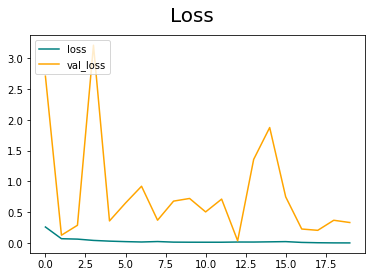

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

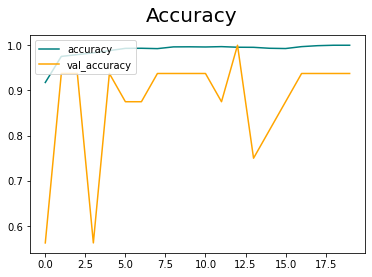

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [39]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [40]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 216ms/step


In [41]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.68606704, shape=(), dtype=float32) tf.Tensor(0.99743587, shape=(), dtype=float32) tf.Tensor(0.713141, shape=(), dtype=float32)


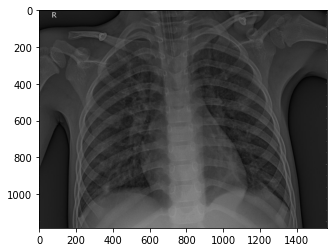

In [42]:
img = cv2.imread('person14_virus_44.jpeg')
plt.imshow(img)
plt.show()

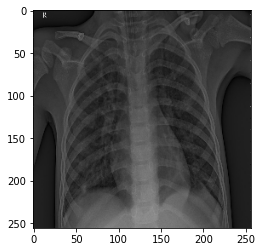

In [43]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [44]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 24ms/step


In [45]:
yhat

array([[0.99999595]], dtype=float32)

In [35]:
if yhat > 0.5: 
    print(f'Predicted class has pneumonia')
else:
    print(f'Predicted class does not have pneumonia')

Predicted class has pneumonia


In [36]:
from tensorflow.keras.models import load_model

In [37]:
model.save('imageclassifierbetter.h5')

In [38]:
new_model = load_model('imageclassifierbetter.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 59ms/step


array([[0.645924]], dtype=float32)